### Introduction : Practicum Codejams Hackathon
#### Who are top solar and wind energy producers in the world? Read on to find out...

 Krysta and I decided to use two different energy datasets, the global solar power tracker, and the global wind power tracker, for our project. These spreadsheets included alot of information but we narrowed it down to country, region, status of operating which means active and start year(implentation of that operating status).To make the datasets more readable I first uploaded the necessary libraries and then the two datasets. I then checked for null values in both datasets. After that I filtered the status column for both datasets to “Operating”, which means that the solar/wind plant is in operation. We filtered for this column because we wanted our three main graphs to only have data for active energy sources only. To make the graphs more readable we filtered the data by county and/or region. 

 Our major findings were that the United States usually started to implement energy first but did it in a slow, consistent manner. China would usually be a later adopter of the energy source but usually seemed committed as the graphs show explosive growth usually in the fifth year of implementation. We see that Asia is dominant in solar and wind energy implementation and its not even close.

 In our report, we have two bar graphs that show the top 10 wind and solar producing countries.
After those you will see two-line graphs which shows the rate of adoption of wind and solar production by country since 1980 and 2009.The last graph is a stacked, horizontal bar graph which displays the total energy production by region.


### Intializing, Loading and Exploring Data

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib
matplotlib.style.use('seaborn-bright')


In [31]:
wind = pd.read_csv(r'C:\Users\wnews\Downloads\Windpowerdata.csv')
solar = pd.read_csv(r'C:\Users\wnews\Downloads\Solarpowerdata.csv')

In [32]:
print(wind.shape) 
print(wind.info()) 
print(solar.shape) 
print(solar.info()) 

(20191, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20191 entries, 0 to 20190
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Country                                   20191 non-null  object 
 1   Project Name                              20191 non-null  object 
 2   Phase Name                                8250 non-null   object 
 3   Project Name in Local Language / Script   7798 non-null   object 
 4   Other Name(s)                             3611 non-null   object 
 5   Capacity (MW)                             20191 non-null  int64  
 6   Installation Type                         20191 non-null  object 
 7   Status                                    20191 non-null  object 
 8   Start year                                14450 non-null  float64
 9   Retired year                              142 non-null    float64
 10  Operator              

In [33]:
print(display(wind))
print(display(solar))

,Country,Project Name,Phase Name,Project Name in Local Language / Script,Other Name(s),Capacity (MW),Installation Type,Status,Start year,Retired year,...,City,"Local area (taluk, county)","Major area (prefecture, district)",State/Province,Region,GEM location ID,GEM phase ID,Other IDs (location),Other IDs (unit/phase),Wiki URL
0,Algeria,Kabertene wind farm,NaN,"مزرعة رياح كبيرت,, مدينة أدرار",Kabartene wind farm,10,onshore,operating,2014.0,NaN,...,Kabertene,Tsabit District,NaN,Adrar,Africa,L900124,G900162,NaN,NaN,https://gem.wiki/Kabertene_wind_farm
1,Algeria,Khenchela wind farm,NaN,مزرعة رياح خنشلة,NaN,20,onshore,construction,NaN,NaN,...,Khenchela,NaN,NaN,NaN,Africa,L900137,G900178,NaN,NaN,https://gem.wiki/Khenchela_wind_farm
2,Algeria,Upper Plateaus wind farm,NaN,NaN,NaN,5010,onshore,development,2030.0,NaN,...,Beidha,NaN,NaN,NaN,Africa,L900099,G900128,NaN,NaN,https://gem.wiki/Upper_Plateaus_wind_farm
3,Angola,Cuanza Norte wind farm,NaN,NaN,NaN,40,onshore,cancelled,NaN,NaN,...,NaN,NaN,NaN,Cuanza Norte,Africa,L900138,G900179,NaN,NaN,https://gem.wiki/Cuanza_Norte_wind_farm
4,Angola,Kiwaba Nzoji wind farm,NaN,NaN,NaN,104,onshore,development,NaN,NaN,...,NaN,Kiwaba Nzoji,NaN,Malanje,Africa,L900130,G900170,NaN,NaN,https://gem.wiki/Kiwaba_Nzoji_wind_farm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20186,Uruguay,Valentines wind farm,NaN,Parque Eólico Valentines,NaN,70,onshore,operating,2016.0,NaN,...,NaN,Valentines,NaN,Treinta y Tres Department,South America,L904995,G906199,NaN,NaN,https://gem.wiki/Valentines_wind_farm
20187,Uruguay,Villa Rodriguez wind farm,NaN,Parque Eólico Villa Rodriguez,NaN,10,onshore,operating,2016.0,NaN,...,Villa Rodriguez,NaN,NaN,San José,South America,L905509,G907540,NaN,NaN,https://gem.wiki/Villa_Rodriguez_wind_farm
20188,Venezuela,La Guajira wind farm,1-A,Parque Eólico La Guajira,NaN,12,onshore,mothballed,2013.0,NaN,...,NaN,Municipio Indígena Guajira,NaN,Zulia State,South America,L905443,G907342,NaN,NaN,https://gem.wiki/La_Guajira_wind_farm
20189,Venezuela,La Guajira wind farm,1-B,Parque Eólico La Guajira,NaN,12,onshore,mothballed,2013.0,NaN,...,NaN,Municipio Indígena Guajira,NaN,Zulia State,South America,L905443,G907343,NaN,NaN,https://gem.wiki/La_Guajira_wind_farm


None


,Country,Project Name,Phase Name,Project Name in Local Language / Script,Other Name(s),Capacity (MW),Capacity Rating,Status,Start year,Retired year,...,City,"Local area (taluk, county)","Major area (prefecture, district)",State/Province,Region,GEM location ID,GEM phase ID,Other IDs (location),Other IDs (unit/phase),Wiki URL
0,Algeria,Adrar Solar Plant,NaN,NaN,NaN,20,MWp/dc,operating,2015.0,NaN,...,Adrar,Adrar District,NaN,Adrar,Africa,L800008,G800008,Wks0068905,NaN,https://gem.wiki/Adrar_Solar_Plant
1,Algeria,Ain Azel solar farm,NaN,محطة توليد الكهرباء بعين زادة,NaN,20,unknown,operating,NaN,NaN,...,Ain Azel,Ain Arnat,NaN,Sétif,Africa,L800010,G800010,Wks0065285,NaN,https://gem.wiki/Ain_Azel_solar_farm
2,Algeria,Ain El Ibel Solar,PV 1,محطة عين الابل للطاقة الشمسية ١,Ain Albel 1 solar plant,20,unknown,operating,2016.0,NaN,...,Ain El Ibel,Aïn El Ibel District,NaN,Djelfa,Africa,L800012,G800012,Wks0068916,NaN,https://gem.wiki/Ain_El_Ibel_Solar
3,Algeria,Ain El Ibel Solar,PV 2,محطة عين الابل للطاقة الشمسية ٢,Ain Albel 2 solar plant,33,unknown,operating,2017.0,NaN,...,Ain El Ibel,Aïn El Ibel District,NaN,Djelfa,Africa,L800012,G800013,Wks0073479,NaN,https://gem.wiki/Ain_El_Ibel_Solar
4,Algeria,Ain El Mehl Solar,NaN,محطة عين الملح للطاقة الشمسية,Ain El Melh Solar,20,unknown,operating,2017.0,NaN,...,Ain El Mehl,Aïn El Melh District,NaN,M'Sila,Africa,L800013,G800014,Wks0068915,NaN,https://gem.wiki/Ain_El_Mehl_Solar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9326,Uruguay,Alto Cielo PV Solar Plant,NaN,Planta Solar Fotovoltaica Alto Cielo,NaN,26,MWp/dc,operating,2016.0,NaN,...,NaN,NaN,NaN,Artigas,South America,L807498,G809030,Ury0000834,NaN,https://gem.wiki/Alto_Cielo_PV_Solar_Plant
9327,Uruguay,El Naranjal Solar Plant,NaN,Planta Solar El Naranjal,NaN,59,MWp/dc,operating,2017.0,NaN,...,NaN,NaN,NaN,Salto,South America,L807010,G808063,Ury0000884,NaN,https://gem.wiki/El_Naranjal_Solar_Plant
9328,Uruguay,Giacote PV Solar Project,Young Facility,Planta Solar Fotovoltaica Giacota,NaN,20,MWp/dc,operating,NaN,NaN,...,NaN,NaN,Young,Río Negro,South America,L807433,G808943,NaN,NaN,https://gem.wiki/Giacote_PV_Solar_Project
9329,Uruguay,La Jacinta Solar Plant,NaN,Planta Solar La Jacinta,NaN,65,MWp/dc,operating,2015.0,NaN,...,NaN,NaN,NaN,Salto,South America,L807232,G808533,Ury0000801,NaN,https://gem.wiki/La_Jacinta_Solar_Plant


None


#### Checking Dataset(s) for Null Values

In [34]:
print(wind.isnull().sum())
print(solar.isnull().sum())


Country                                         0
Project Name                                    0
Phase Name                                  11941
Project Name in Local Language / Script     12393
Other Name(s)                               16580
Capacity (MW)                                   0
Installation Type                               0
Status                                          0
Start year                                   5741
Retired year                                20049
Operator                                     6261
Operator Name in Local Language / Script    16081
Owner                                        5442
Owner Name in Local Language / Script       16795
Latitude                                        0
Longitude                                       0
Location accuracy                               0
City                                        10780
Local area (taluk, county)                   5410
Major area (prefecture, district)           10986


#### Filtering Dataset(s) For Active Solar/Wind Plants
When 'Status' Column = 'Operating'

In [35]:
winduse = wind[wind['Status'] == "operating"] 
solaruse = solar[solar['Status'] == "operating"] 

## Dropping Unnecessary Columns
 Columns Dropped == Wiki Url, Phase Name, Project Name in Local Language / Script, Other Name(s), Capacity Rating, Retired Year, Operator, Operator Name in Local Language / Script, Other IDs(location), Other IDs(unit/phase), Gem Phase ID, Location accuracy, Local Area, Major Area) 

 The columns removed have no impact on the dataset(s) and how we want to visualize it.

In [36]:
winduse = winduse.drop(columns=['Wiki URL','Project Name', 'Phase Name', 'Project Name in Local Language / Script','Other Name(s)','Installation Type','Retired year','Operator','Operator Name in Local Language / Script','Owner','Owner Name in Local Language / Script','Location accuracy','Local area (taluk, county)','Major area (prefecture, district)','Other IDs (location)','Other IDs (unit/phase)','GEM phase ID'])
solaruse = solaruse.drop(columns=['Project Name','Phase Name','Project Name in Local Language / Script','Other Name(s)','Capacity Rating','Retired year','Operator','Operator Name in Local Language / Script','Owner','Owner Name in Local Language / Script','Location accuracy','Local area (taluk, county)','Major area (prefecture, district)','Other IDs (location)','Other IDs (unit/phase)','GEM phase ID','Wiki URL'])


print(winduse.shape) 
print(winduse.info()) 
print(solaruse.shape) 
print(solaruse.info()) 

(13263, 10)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13263 entries, 0 to 20187
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          13263 non-null  object 
 1   Capacity (MW)    13263 non-null  int64  
 2   Status           13263 non-null  object 
 3   Start year       12421 non-null  float64
 4   Latitude         13263 non-null  float64
 5   Longitude        13263 non-null  float64
 6   City             5812 non-null   object 
 7   State/Province   11944 non-null  object 
 8   Region           13263 non-null  object 
 9   GEM location ID  13263 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 1.1+ MB
None
(5190, 10)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5190 entries, 0 to 9330
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          5190 non-null   object 
 1  

### Fixing Null Values
Both Datasets had numerous null values that needed to be fixed appropriately.
Columns that need to be fixed: 'Start Year', 'City', 'State/Province' 

In [37]:
winduse['Start year'] = winduse['Start year'].fillna(0)
solaruse['Start year'] = solaruse['Start year'].fillna(0)
winduse['State/Province'] = winduse['State/Province'].fillna('unknown')
winduse['City'] = winduse['City'].fillna('unknown')
solaruse['State/Province'] = solaruse['State/Province'].fillna('unknown')
solaruse['City'] = solaruse['City'].fillna('unknown')

print(winduse.isnull().sum())
print(solaruse.isnull().sum())


Country            0
Capacity (MW)      0
Status             0
Start year         0
Latitude           0
Longitude          0
City               0
State/Province     0
Region             0
GEM location ID    0
dtype: int64
Country            0
Capacity (MW)      0
Status             0
Start year         0
Latitude           0
Longitude          0
City               0
State/Province     0
Region             0
GEM location ID    0
dtype: int64


### Converting Energy to Numeric Type
Changing the 'Capacity (MW)' column from int64 to float64

In [38]:
winduse['Capacity (MW)']=winduse['Capacity (MW)'].astype(float)
solaruse['Capacity (MW)']=solaruse['Capacity (MW)'].astype(float)


In [39]:
winduse.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13263 entries, 0 to 20187
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          13263 non-null  object 
 1   Capacity (MW)    13263 non-null  float64
 2   Status           13263 non-null  object 
 3   Start year       13263 non-null  float64
 4   Latitude         13263 non-null  float64
 5   Longitude        13263 non-null  float64
 6   City             13263 non-null  object 
 7   State/Province   13263 non-null  object 
 8   Region           13263 non-null  object 
 9   GEM location ID  13263 non-null  object 
dtypes: float64(4), object(6)
memory usage: 1.1+ MB


## Data Visualization
### Graph One: Top 10 Solar/Wind Producing Countries 
Creating horizontal, bar graphs that show the top ten countries and how much solar/wind energy they have produced.

In [40]:
topwind = winduse.pivot_table(index='Country',values=['Capacity (MW)'],aggfunc='sum').sort_values('Capacity (MW)', ascending=False)
print(topwind.head(10))
topsolar = solaruse.pivot_table(index='Country',values=['Capacity (MW)'],aggfunc='sum').sort_values('Capacity (MW)', ascending=False)
print(topsolar.head(10))


                Capacity (MW)
Country                      
China                261191.0
United States        127324.0
Germany               39614.0
Spain                 26787.0
India                 23671.0
United Kingdom        22714.0
Brazil                19731.0
France                15997.0
Canada                13345.0
Sweden                10975.0
               Capacity (MW)
Country                     
China               130309.0
United States        43379.0
India                28990.0
Vietnam              11250.0
Mexico               10499.0
Japan                 7669.0
Spain                 6220.0
Australia             6071.0
Brazil                3840.0
Chile                 3687.0


[Text(0, 0, '130309'),
 Text(0, 0, '43379'),
 Text(0, 0, '28990'),
 Text(0, 0, '11250'),
 Text(0, 0, '10499'),
 Text(0, 0, '7669'),
 Text(0, 0, '6220'),
 Text(0, 0, '6071'),
 Text(0, 0, '3840'),
 Text(0, 0, '3687')]

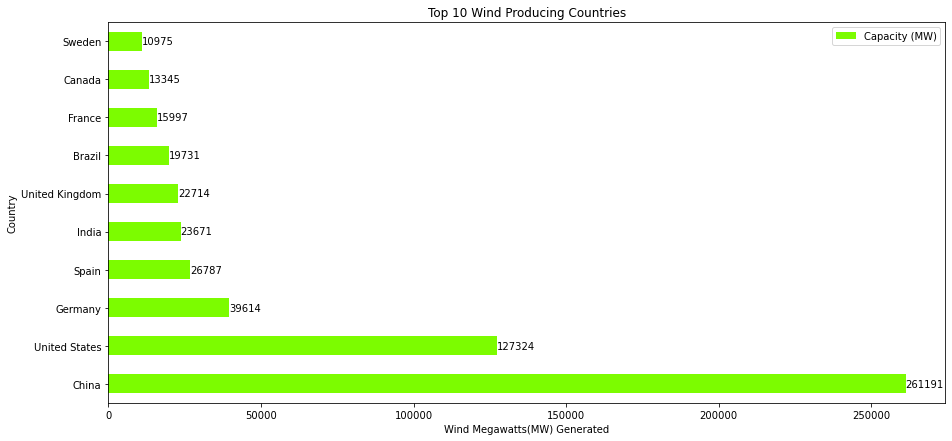

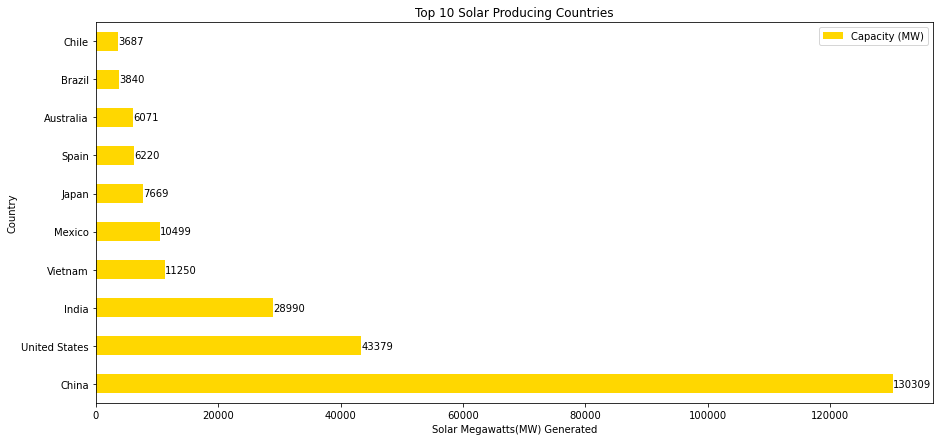

In [41]:
topwind = topwind.nlargest(10, 'Capacity (MW)').plot(kind ='barh', title = 'Top 10 Wind Producing Countries', color= {"Capacity (MW)" : "#7CFC00"},figsize=(15,7))
topwind.set_xlabel("Wind Megawatts(MW) Generated")
topwind.set_ylabel("Country")
topwind.bar_label(topwind.containers[0])


topsolar = topsolar.nlargest(10, 'Capacity (MW)').plot(kind ='barh', title = 'Top 10 Solar Producing Countries', color= {"Capacity (MW)" : "#FFD700"},figsize=(15,7))
topsolar.set_xlabel("Solar Megawatts(MW) Generated")
topsolar.set_ylabel("Country")
topsolar.bar_label(topsolar.containers[0])


#### Graph One
From the wind and solar datasets, we created two horizontal bar graphs. We chose this kind of graph because it could simply show the top 10 solar and wind producing countries since 1980. Since there were over 60 countries per dataset, we wanted to limit our efforts to countries with the most output. The bar graphs were very telling in more ways than one. We see that China is a massive leader in the wind energy race. The top 9 countries combined have only generated 12,000 MW (megawatts) more than their Asian counterpart. China continues its dominance with solar energy production. This time the eastern superpower beats out the remaining top 9 countries by over 8,000 MW. These graphs just reinforce China’s solar and wind energy dominance.

## Data Visualization
### Graph Two: Wind/Solar Implementation in Top 5 Countries
Creating line graphs that display the top countries and their implementation journey with wind/solar energy

In [42]:
print(winduse['Start year'].unique())
print(solaruse['Start year'].unique())


[2014. 2018. 2019. 2021. 2000. 2001. 2003. 2004. 2006. 2008. 2009.    0.
 2012. 2015. 2013. 2016. 2007. 2005. 2020. 2011. 2017. 2010. 1999. 2022.
 2023. 1995. 1990. 1996. 1997. 2002. 1998. 1993. 1994. 1992. 1988. 1987.
 1985. 1981. 1984. 1989. 1986.]
[2015.    0. 2016. 2017. 2018. 2014. 2019. 2020. 2022. 2021. 2013. 2009.
 2011. 2012. 2010. 2008. 2007.]


In [43]:
windperyr = winduse.pivot_table(index=['Country', 'Start year'], values='Capacity (MW)', aggfunc = ['sum'])
print(windperyr)

solarperyr = solaruse.pivot_table(index=['Country', 'Start year'], values='Capacity (MW)',aggfunc = ['sum'])
print(solarperyr)

                                    sum
                          Capacity (MW)
Country        Start year              
Algeria        2014.0              10.0
Argentina      0.0                100.0
               2000.0              18.0
               2011.0              25.0
               2012.0              83.0
...                                 ...
Vietnam        2022.0              50.0
Western Sahara 2013.0              51.0
               2018.0             202.0
               2021.0             300.0
Åland Islands  2007.0              14.0

[869 rows x 1 columns]
                                    sum
                          Capacity (MW)
Country        Start year              
Afghanistan    0.0                 30.0
Algeria        0.0                 20.0
               2014.0              20.0
               2015.0              35.0
               2016.0             213.0
...                                 ...
Vietnam        2020.0            4442.0
               2

In [44]:
topwindcities = ['India','Spain','Germany','United States','China'] 
windusage = winduse[winduse['Country'].isin(topwindcities)]
topsolarcities = ['Mexico','Vietnam','India','United States','China']
solarusage = solaruse[solaruse['Country'].isin(topsolarcities)]



In [45]:
windusage = windusage.loc[windusage['Start year'] >= 1.0]
solarusage = solarusage.loc[solarusage['Start year'] >= 1.0]

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


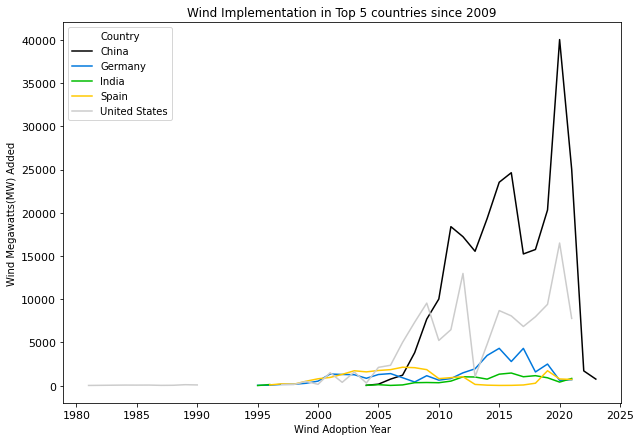

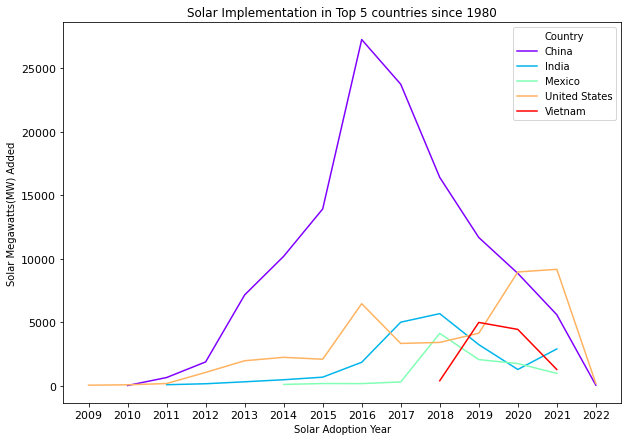

In [46]:
windline = windusage.pivot_table(index='Start year',columns=['Country'],values='Capacity (MW)', aggfunc='sum').plot(kind = 'line',figsize=(10,7), title = 'Wind Implementation in Top 5 countries since 2009',cmap='nipy_spectral',
                                                                                                             grid= False, xticks=(1980,1985,1990,1995,2000,2005,2010,2015,2020,2025),fontsize=11)
solarline = solarusage.pivot_table(index='Start year',columns=['Country'],values='Capacity (MW)', aggfunc='sum').plot(kind = 'line',figsize=(10,7), title = 'Solar Implementation in Top 5 countries since 1980',cmap='rainbow', 
                                                                                                             grid= False, xticks=(2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022),fontsize=11)

windline.set_xlabel("Wind Adoption Year")
windline.set_ylabel("Wind Megawatts(MW) Added")
solarline.set_xlabel("Solar Adoption Year")
solarline.set_ylabel("Solar Megawatts(MW) Added")
print(windline)
print(solarline)

#### Graph Two
We decided to create two separate line graphs for the implementation of solar and wind energy. We only observed the top 5 countries in both graphs so it would be easy to see the growth/decline of countries on their alternative energy journeys. The solar graph shows China’s dominance over a 10-year period in a different light; however, the graph also displays the United States consistency. It was the first country to implement solar energy and consistently did it over a 13-year period, albeit not on the level of China. The wind graph reflects some of the same information as the solar, the United States being the first to implement and China dominating. One interesting aspect of the solar graph is although China is dominating the space, they were the latest adopter.

## Data Visualization
### Graph Three: Total Wind/Solar Energy Production by Region
Creating a stacked, horizontal bar graph that reflects the combined wind/solar energy production by region.

In [47]:
print(display(winduse))
print(display(solaruse))

,Country,Capacity (MW),Status,Start year,Latitude,Longitude,City,State/Province,Region,GEM location ID
0,Algeria,10.0,operating,2014.0,28.4624,-0.0576,Kabertene,Adrar,Africa,L900124
11,Egypt,240.0,operating,2018.0,25.8577,34.4182,Al Qusair City,Red Sea,Africa,L900045
12,Egypt,220.0,operating,2018.0,25.8577,34.4182,Al Qusair City,Red Sea,Africa,L900045
13,Egypt,120.0,operating,2018.0,25.8577,34.4182,Al Qusair City,Red Sea,Africa,L900045
14,Egypt,263.0,operating,2019.0,28.4005,32.9572,unknown,Red Sea,Africa,L900026
...,...,...,...,...,...,...,...,...,...,...
20183,Uruguay,10.0,operating,2016.0,-34.6145,-55.4873,Solis de Mataojo,Canelones,South America,L905510
20184,Uruguay,50.0,operating,2015.0,-33.6273,-56.6969,Trinidad,Flores,South America,L904939
20185,Uruguay,50.0,operating,2014.0,-33.5977,-56.6719,unknown,Flores,South America,L904939
20186,Uruguay,70.0,operating,2016.0,-33.2899,-55.1006,unknown,Treinta y Tres Department,South America,L904995


None


,Country,Capacity (MW),Status,Start year,Latitude,Longitude,City,State/Province,Region,GEM location ID
0,Algeria,20.0,operating,2015.0,27.9077,-0.3174,Adrar,Adrar,Africa,L800008
1,Algeria,20.0,operating,0.0,36.1611,5.3321,Ain Azel,Sétif,Africa,L800010
2,Algeria,20.0,operating,2016.0,34.3447,3.1636,Ain El Ibel,Djelfa,Africa,L800012
3,Algeria,33.0,operating,2017.0,34.3433,3.1696,Ain El Ibel,Djelfa,Africa,L800012
4,Algeria,20.0,operating,2017.0,34.8597,4.2026,Ain El Mehl,M'Sila,Africa,L800013
...,...,...,...,...,...,...,...,...,...,...
9326,Uruguay,26.0,operating,2016.0,-30.4214,-57.4574,unknown,Artigas,South America,L807498
9327,Uruguay,59.0,operating,2017.0,-31.2603,-57.8739,unknown,Salto,South America,L807010
9328,Uruguay,20.0,operating,0.0,-32.6848,-57.6034,unknown,Río Negro,South America,L807433
9329,Uruguay,65.0,operating,2015.0,-31.4315,-57.9088,unknown,Salto,South America,L807232


None


In [48]:
topwindregion = winduse.pivot_table(index='Region',values=['Capacity (MW)'],aggfunc='sum').sort_values('Capacity (MW)', ascending=False)
topsolarregion = solaruse.pivot_table(index='Region',values=['Capacity (MW)'],aggfunc='sum').sort_values('Capacity (MW)', ascending=False)
topwindregion = topwindregion.rename(columns={"Capacity (MW)": "Wind Capacity"})
topsolarregion = topsolarregion.rename(columns={"Capacity (MW)":"Solar Capacity"})
print(display(topwindregion))
print(display(topsolarregion))

,Wind Capacity
Region,
Asia,298436.0
Europe,176919.0
North America,147699.0
South America,27229.0
Eurasia,10166.0
Oceania,9623.0
Africa,7460.0
Central America and the Caribbean,2235.0
Middle East,1610.0


None


,Solar Capacity
Region,
Asia,184439.0
North America,54860.0
Europe,19042.0
South America,9224.0
Africa,6986.0
Oceania,6097.0
Middle East,4667.0
Eurasia,2805.0
Central America and the Caribbean,1563.0


None


In [49]:
regionmw = pd.concat([topwindregion, topsolarregion], axis=1)
regionmw

totalmw = ['Wind Capacity','Solar Capacity']
regionmw

,Wind Capacity,Solar Capacity
Region,,
Asia,298436.0,184439.0
Europe,176919.0,19042.0
North America,147699.0,54860.0
South America,27229.0,9224.0
Eurasia,10166.0,2805.0
Oceania,9623.0,6097.0
Africa,7460.0,6986.0
Central America and the Caribbean,2235.0,1563.0
Middle East,1610.0,4667.0


In [50]:
regionmw.reset_index(inplace=True)
regionmw = regionmw.rename(columns = {'Region':'Regions'})
regionmw

,Regions,Wind Capacity,Solar Capacity
0,Asia,298436.0,184439.0
1,Europe,176919.0,19042.0
2,North America,147699.0,54860.0
3,South America,27229.0,9224.0
4,Eurasia,10166.0,2805.0
5,Oceania,9623.0,6097.0
6,Africa,7460.0,6986.0
7,Central America and the Caribbean,2235.0,1563.0
8,Middle East,1610.0,4667.0


Text(0, 0.5, 'Region')

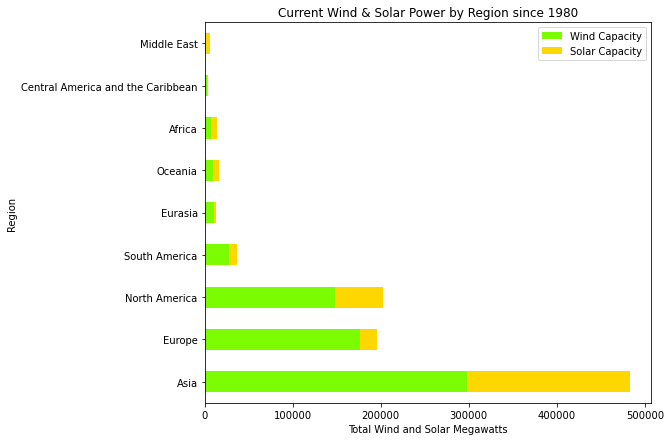

In [51]:
regionmw = regionmw.plot(kind='barh', x='Regions', stacked=True, title='Current Wind & Solar Power by Region since 1980',figsize=(8,7), color = {"Solar Capacity" : "#FFD700", "Wind Capacity": '#7CFC00'})
regionmw.set_xlabel("Total Wind and Solar Megawatts")
regionmw.set_ylabel("Region")



#### Graph Three
 For our last chart, we wanted to go a little bigger, so we made a stacked, horizontal bar graph based on total solar and wind power by region since 1980. It’s no surprise that Asia, home of the energy giant that is China, has a massive lead with just over 482,875 total MW implemented. Although Europe has more wind energy implemented, North America takes second place due to strength (54,000 solar MW implemented) in the solar energy department.  Asia is definitely the leader in wind and solar energy implementation, but we can see that the western giants, Europe and United States, can cut into the lead with consistent implementation.

## Interactive Visualization
### Subset of Data

In [52]:
wind2 = wind[(wind.Status == "operating") | (wind.Status == 'construction')]
solar2 = solar[(solar.Status == "operating") | (solar.Status == 'construction')]
wind2 = wind2.drop(columns=['Wiki URL','Project Name', 'Phase Name', 'Project Name in Local Language / Script','Other Name(s)','Installation Type','Retired year','Operator','Operator Name in Local Language / Script','Owner','Owner Name in Local Language / Script','Location accuracy','Local area (taluk, county)','Major area (prefecture, district)','Other IDs (location)','Other IDs (unit/phase)','GEM phase ID','GEM location ID','City','State/Province'])
solar2 = solar2.drop(columns=['Project Name','Phase Name','Project Name in Local Language / Script','Other Name(s)','Capacity Rating','Retired year','Operator','Operator Name in Local Language / Script','Owner','Owner Name in Local Language / Script','Location accuracy','Local area (taluk, county)','Major area (prefecture, district)','Other IDs (location)','Other IDs (unit/phase)','GEM phase ID','Wiki URL','GEM location ID','State/Province','City'])


In [53]:
wind2 = wind2.dropna()
solar2 = solar2.dropna()
solar2 = solar2.rename(columns={'Capacity (MW)':'Solar Capacity'})
wind2 = wind2.rename(columns={'Capacity (MW)':'Wind Capacity'})

print(display(wind2))
print(display(solar2))

,Country,Wind Capacity,Status,Start year,Latitude,Longitude,Region
0,Algeria,10,operating,2014.0,28.4624,-0.0576,Africa
10,Egypt,250,construction,2023.0,28.3553,33.0622,Africa
11,Egypt,240,operating,2018.0,25.8577,34.4182,Africa
12,Egypt,220,operating,2018.0,25.8577,34.4182,Africa
13,Egypt,120,operating,2018.0,25.8577,34.4182,Africa
...,...,...,...,...,...,...,...
20183,Uruguay,10,operating,2016.0,-34.6145,-55.4873,South America
20184,Uruguay,50,operating,2015.0,-33.6273,-56.6969,South America
20185,Uruguay,50,operating,2014.0,-33.5977,-56.6719,South America
20186,Uruguay,70,operating,2016.0,-33.2899,-55.1006,South America


None


,Country,Solar Capacity,Status,Start year,Latitude,Longitude,Region
0,Algeria,20,operating,2015.0,27.9077,-0.3174,Africa
2,Algeria,20,operating,2016.0,34.3447,3.1636,Africa
3,Algeria,33,operating,2017.0,34.3433,3.1696,Africa
4,Algeria,20,operating,2017.0,34.8597,4.2026,Africa
5,Algeria,30,operating,2016.0,34.5320,0.8040,Africa
...,...,...,...,...,...,...,...
9324,Peru,180,operating,2018.0,-17.2582,-71.1934,South America
9325,Peru,22,operating,2012.0,-17.9930,-70.3367,South America
9326,Uruguay,26,operating,2016.0,-30.4214,-57.4574,South America
9327,Uruguay,59,operating,2017.0,-31.2603,-57.8739,South America


None


In [55]:
data = [wind2, solar2]

mergedata = pd.concat(data)
mergedata = mergedata.fillna(0)
mergedata
mergedata.reset_index(inplace=True)
mergedata

,index,Country,Wind Capacity,Status,Start year,Latitude,Longitude,Region,Solar Capacity
0,0,Algeria,10.0,operating,2014.0,28.4624,-0.0576,Africa,0.0
1,10,Egypt,250.0,construction,2023.0,28.3553,33.0622,Africa,0.0
2,11,Egypt,240.0,operating,2018.0,25.8577,34.4182,Africa,0.0
3,12,Egypt,220.0,operating,2018.0,25.8577,34.4182,Africa,0.0
4,13,Egypt,120.0,operating,2018.0,25.8577,34.4182,Africa,0.0
...,...,...,...,...,...,...,...,...,...
18382,9324,Peru,0.0,operating,2018.0,-17.2582,-71.1934,South America,180.0
18383,9325,Peru,0.0,operating,2012.0,-17.9930,-70.3367,South America,22.0
18384,9326,Uruguay,0.0,operating,2016.0,-30.4214,-57.4574,South America,26.0
18385,9327,Uruguay,0.0,operating,2017.0,-31.2603,-57.8739,South America,59.0


In [56]:
mergedata.to_csv(r'C:\Users\wnews\merge df.csv')
print(mergedata)

       index  Country  Wind Capacity        Status  Start year  Latitude  \
0          0  Algeria           10.0     operating      2014.0   28.4624   
1         10    Egypt          250.0  construction      2023.0   28.3553   
2         11    Egypt          240.0     operating      2018.0   25.8577   
3         12    Egypt          220.0     operating      2018.0   25.8577   
4         13    Egypt          120.0     operating      2018.0   25.8577   
...      ...      ...            ...           ...         ...       ...   
18382   9324     Peru            0.0     operating      2018.0  -17.2582   
18383   9325     Peru            0.0     operating      2012.0  -17.9930   
18384   9326  Uruguay            0.0     operating      2016.0  -30.4214   
18385   9327  Uruguay            0.0     operating      2017.0  -31.2603   
18386   9329  Uruguay            0.0     operating      2015.0  -31.4315   

       Longitude         Region  Solar Capacity  
0        -0.0576         Africa      

### JSON File Creation
Created a json file of the merged dataframe listed above. File was sent to my SWE counterpart 
and was used to create a interactive visualization. 

In [57]:
import json
mergedata = mergedata.to_json(orient='index')


In [ ]:
import json

with open('personal.json', 'w') as json_file:
    json.dump(gh, json_file)

## Reporting

### Conclusion


Throughout our analysis of the Wind and Solar datasets, we saw various stories that the data told.

It shows that China and the United States are obvious solar and wind enthusiasts, both producing their alternative energy sources at a high level. China however pulls away from the United States and other countries as they have dominated implementation.

It also displayed that even though the United States was always the first to implement, China was not too far behind and always outpaced their western counterpart.

 

China was a popular topic in these datasets but Asia as a region wins. Its combined solar and energy production was double of the next region, North America.

Even though our focus was only active solar and wind plants I believe the datasets could be dove in multiple different ways. You could focus on construction status and see which countries are positioned to dominate in the future. You could also look at statuses related to retired and see what countries were on the up and up but fell apart.

